In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table1 = pd.read_csv('bank_churners.csv')
table2 = pd.read_csv('client_info.csv')
table3 = pd.read_csv('Cities_Location.csv') 

In [3]:
table1.head(3)

,No,customerID,CheckingAccount,SavingAccount,CertificatesofDeposit,Mortgages,Loans,CreditCard,DebitCard,CreditScore,TotalRelationshipCount,ContactsCount12month,TotalTransactionCount,CustomerSince,Churn
0,5112,6686-YPGHK,Yes,No,Yes,No,No,No,No,367,2,2,68,1/2/2023,Yes
1,5517,6923-EFPNL,Yes,Yes,No,No,No,Platinum,No,825,3,3,107,1/2/2023,Yes
2,3517,7587-RZNME,Yes,No,No,No,No,Standart,Standart,612,3,3,845,1/5/2023,Yes


In [4]:
table2.head(3)

,customerID,gender,Birthdate,MartialStatus,Dependents,EducationLevel,Income,CityID
0,2519-LBNQL,Male,4/14/1953,Divorced,3,University,150,19
1,9574-RKJIF,Male,10/29/1952,Married,1,University,150,34
2,8775-LHDJH,Female,2/17/1954,Divorced,0,University,150,23


In [5]:
table3.head(3)

,CityID,Country,City,Latitude,Longitude,Altitude
0,1,Azerbaijan,Agcabadi,40.052778,47.461388,24
1,2,Azerbaijan,Agdam,39.993056,46.930557,363
2,3,Azerbaijan,Agdas,40.650000,47.476112,42


In [6]:
table1.describe()

,No,CreditScore,TotalRelationshipCount,ContactsCount12month,TotalTransactionCount
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,664.289649,4.525202,1.321312,535.752378
std,2033.283305,142.994681,1.298650,1.115833,264.206641
min,1.000000,300.000000,1.000000,0.000000,16.000000
25%,1761.500000,568.000000,4.000000,0.000000,279.000000
50%,3522.000000,693.000000,5.000000,1.000000,537.000000
75%,5282.500000,786.000000,5.000000,2.000000,767.000000
max,7043.000000,850.000000,7.000000,4.000000,1000.000000


In [7]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   No                      7043 non-null   int64 
 1   customerID              7043 non-null   object
 2   CheckingAccount         7043 non-null   object
 3   SavingAccount           7042 non-null   object
 4   CertificatesofDeposit   7043 non-null   object
 5   Mortgages               7043 non-null   object
 6   Loans                   7043 non-null   object
 7   CreditCard              7043 non-null   object
 8   DebitCard               7043 non-null   object
 9   CreditScore             7043 non-null   int64 
 10  TotalRelationshipCount  7043 non-null   int64 
 11  ContactsCount12month    7043 non-null   int64 
 12  TotalTransactionCount   7043 non-null   int64 
 13  CustomerSince           7043 non-null   object
 14  Churn                   7043 non-null   object
dtypes: i

In [8]:
table1[table1.duplicated()].count()

No                        0
customerID                0
CheckingAccount           0
SavingAccount             0
CertificatesofDeposit     0
Mortgages                 0
Loans                     0
CreditCard                0
DebitCard                 0
CreditScore               0
TotalRelationshipCount    0
ContactsCount12month      0
TotalTransactionCount     0
CustomerSince             0
Churn                     0
dtype: int64

In [9]:
# Checking for unique variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(table1.columns):
    variables.loc[i] = [var, table1[var].nunique(), table1[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,No,7043,"[5112, 5517, 3517, 2062, 1888, 4645, 1540, 209..."
1,customerID,7043,"[6686-YPGHK, 6923-EFPNL, 7587-RZNME, 4958-GZWI..."
2,CheckingAccount,2,"[Yes, No]"
3,SavingAccount,2,"[No, Yes, nan]"
4,CertificatesofDeposit,2,"[Yes, No]"
5,Mortgages,2,"[No, Yes]"
6,Loans,3,"[No, Yes, No ]"
7,CreditCard,5,"[No, Platinum, Standart, Gold, Premium]"
8,DebitCard,5,"[No, Standart, Premium, Platinum, Gold]"
9,CreditScore,550,"[367, 825, 612, 698, 640, 468, 660, 522, 685, ..."


In [10]:
#we can see in "Loans" column there's typo. we should fix it. LET'S DO THIS
table1['Loans'].replace('No ', 'No', inplace=True)

In [11]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(table1.columns):
    variables.loc[i] = [var, table1[var].nunique(), table1[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,No,7043,"[5112, 5517, 3517, 2062, 1888, 4645, 1540, 209..."
1,customerID,7043,"[6686-YPGHK, 6923-EFPNL, 7587-RZNME, 4958-GZWI..."
2,CheckingAccount,2,"[Yes, No]"
3,SavingAccount,2,"[No, Yes, nan]"
4,CertificatesofDeposit,2,"[Yes, No]"
5,Mortgages,2,"[No, Yes]"
6,Loans,2,"[No, Yes]"
7,CreditCard,5,"[No, Platinum, Standart, Gold, Premium]"
8,DebitCard,5,"[No, Standart, Premium, Platinum, Gold]"
9,CreditScore,550,"[367, 825, 612, 698, 640, 468, 660, 522, 685, ..."


In [12]:
table2.describe()

,Dependents,Income,CityID
count,7043.000000,7043.000000,7043.000000
mean,1.114156,1687.356240,25.907142
std,1.519457,905.051977,14.390452
min,0.000000,150.000000,1.000000
25%,0.000000,900.000000,14.000000
50%,1.000000,1500.000000,26.000000
75%,1.000000,2500.000000,38.000000
max,5.000000,3500.000000,50.000000


In [13]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      7043 non-null   object
 1   gender          7043 non-null   object
 2   Birthdate       7043 non-null   object
 3   MartialStatus   7043 non-null   object
 4   Dependents      7043 non-null   int64 
 5   EducationLevel  7043 non-null   object
 6   Income          7043 non-null   int64 
 7   CityID          7043 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 440.3+ KB


In [14]:
table2[table2.duplicated()].count()

customerID        0
gender            0
Birthdate         0
MartialStatus     0
Dependents        0
EducationLevel    0
Income            0
CityID            0
dtype: int64

In [15]:
variables = pd.DataFrame(columns=['Variable','No of unique values','Values'])

for i, var in enumerate(table2.columns):
    variables.loc[i] = [var, table2[var].nunique(), table2[var].unique().tolist()]
    
variables

,Variable,No of unique values,Values
0,customerID,7043,"[2519-LBNQL, 9574-RKJIF, 8775-LHDJH, 5973-EJGD..."
1,gender,2,"[Male, Female]"
2,Birthdate,5948,"[4/14/1953, 10/29/1952, 2/17/1954, 2/27/1954, ..."
3,MartialStatus,3,"[Divorced, Married, Single]"
4,Dependents,6,"[3, 1, 0, 5, 2, 4]"
5,EducationLevel,3,"[University, High school, Collage]"
6,Income,29,"[150, 200, 250, 300, 350, 400, 450, 500, 550, ..."
7,CityID,50,"[19, 34, 23, 13, 7, 16, 25, 4, 45, 38, 3, 47, ..."


In [16]:
table3.describe()

,CityID,Latitude,Longitude,Altitude
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,40.336572,47.661972,329.680000
std,14.57738,0.808650,1.214164,365.020181
min,1.00000,38.456111,45.366112,-24.000000
25%,13.25000,39.813889,46.823334,24.250000
50%,25.50000,40.502778,47.681250,187.500000
75%,37.75000,40.819792,48.536874,580.500000
max,50.00000,41.725833,49.952499,1473.000000


In [17]:
table3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CityID     50 non-null     int64  
 1   Country    50 non-null     object 
 2   City       50 non-null     object 
 3   Latitude   50 non-null     float64
 4   Longitude  50 non-null     float64
 5   Altitude   50 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [18]:
table3[table3.duplicated()].count()

CityID       0
Country      0
City         0
Latitude     0
Longitude    0
Altitude     0
dtype: int64

In [19]:
variables = pd.DataFrame(columns=['Variable','No of unique values','Values'])

for i, var in enumerate(table3.columns):
    variables.loc[i] = [var, table3[var].nunique(), table3[var].unique().tolist()]
    
variables

,Variable,No of unique values,Values
0,CityID,50,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Country,1,[Azerbaijan]
2,City,50,"[Agcabadi, Agdam, Agdas, Agstafa, Agsu, Shirva..."
3,Latitude,49,"[40.0527778, 39.9930556, 40.65, 41.1188889, 40..."
4,Longitude,50,"[47.4613876, 46.9305573, 47.4761124, 45.453887..."
5,Altitude,45,"[24, 363, 42, 338, 114, 13, -24, 30, 388, 82, ..."


In [20]:
df1 = table1.copy()
df2 = table2.copy()
df3 = table3.copy()

In [21]:
df = df2.merge(df1, on='customerID').merge(df3, on='CityID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   Birthdate               7043 non-null   object 
 3   MartialStatus           7043 non-null   object 
 4   Dependents              7043 non-null   int64  
 5   EducationLevel          7043 non-null   object 
 6   Income                  7043 non-null   int64  
 7   CityID                  7043 non-null   int64  
 8   No                      7043 non-null   int64  
 9   CheckingAccount         7043 non-null   object 
 10  SavingAccount           7042 non-null   object 
 11  CertificatesofDeposit   7043 non-null   object 
 12  Mortgages               7043 non-null   object 
 13  Loans                   7043 non-null   object 
 14  CreditCard              7043 non-null   

In [22]:
df['Birthdate '] = pd.to_datetime(df['Birthdate '])
df['CustomerSince'] = pd.to_datetime(df['CustomerSince'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customerID              7043 non-null   object        
 1   gender                  7043 non-null   object        
 2   Birthdate               7043 non-null   datetime64[ns]
 3   MartialStatus           7043 non-null   object        
 4   Dependents              7043 non-null   int64         
 5   EducationLevel          7043 non-null   object        
 6   Income                  7043 non-null   int64         
 7   CityID                  7043 non-null   int64         
 8   No                      7043 non-null   int64         
 9   CheckingAccount         7043 non-null   object        
 10  SavingAccount           7042 non-null   object        
 11  CertificatesofDeposit   7043 non-null   object        
 12  Mortgages               7043 non-null   object  

In [23]:
#let's exclude the columns that we will not use, shall we?
df = df.drop(['CityID', 'No', 'Country', 'Latitude', 'Longitude', 'Altitude'], axis=1)
df

,customerID,gender,Birthdate,MartialStatus,Dependents,EducationLevel,Income,CheckingAccount,SavingAccount,CertificatesofDeposit,...,Loans,CreditCard,DebitCard,CreditScore,TotalRelationshipCount,ContactsCount12month,TotalTransactionCount,CustomerSince,Churn,City
0,2519-LBNQL,Male,1953-04-14,Divorced,3,University,150,Yes,Yes,No,...,Yes,Standart,Premium,331,6,0,663,2013-11-07,No,Ismayilli
1,0599-XNYDO,Female,1951-08-17,Married,0,University,200,Yes,No,No,...,No,Premium,Platinum,551,3,0,395,2017-09-25,No,Ismayilli
2,5201-FRKKS,Male,1953-07-30,Married,0,University,300,Yes,No,Yes,...,No,Premium,No,748,3,1,631,2021-11-13,No,Ismayilli
3,2750-BJLSB,Female,1963-12-30,Divorced,0,University,300,Yes,No,Yes,...,Yes,Standart,Premium,602,5,0,955,2014-08-06,No,Ismayilli
4,7996-BPXHY,Female,1985-03-29,Divorced,1,High school,400,Yes,Yes,No,...,Yes,Premium,Standart,802,6,0,548,2005-01-05,No,Ismayilli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0691-IFBQW,Female,1969-05-22,Divorced,4,University,3000,Yes,Yes,Yes,...,Yes,Standart,Premium,505,7,0,490,2005-04-23,Yes,Tovuz
7039,4685-ERGHK,Male,2001-01-30,Single,0,University,3000,Yes,Yes,No,...,No,Standart,Premium,416,4,0,435,2010-10-28,No,Tovuz
7040,2189-WWOEW,Female,1998-06-26,Divorced,2,University,3000,Yes,No,No,...,No,Premium,Platinum,635,4,1,842,2018-11-14,Yes,Tovuz
7041,1131-QQZEB,Male,1971-06-12,Married,5,High school,3000,Yes,Yes,No,...,No,Premium,Standart,843,6,2,296,2014-06-13,No,Tovuz


In [24]:
# little modifications
#1st let's replace some columns with more relevant info
df["CheckingAccount"] = np.where(df["CheckingAccount"] == "Yes", 1, 0)
df["SavingAccount"] = np.where(df["SavingAccount"] == "Yes", 1, 0)
df["CertificatesofDeposit"] = np.where(df["CertificatesofDeposit"] == "Yes", 1, 0)
df["Mortgages"] = np.where(df["Mortgages"] == "Yes", 1, 0)
df["Loans"] = np.where(df["Loans"] == "Yes", 1, 0)
df["tenure"] = 2023 - df["CustomerSince"].dt.year
df["Churn"] = np.where(df["Churn"] == "Yes", 1, 0)
#now let's create new columns that might help us
df["age"] = 2023 - df["Birthdate "].dt.year
df["is_senior"] = np.where(df["age"] > 65, 1, 0)
df["has_credit_card"] = np.where(df["CreditCard"] == "No", 0, 1)
df["has_debit_card"] = np.where(df["DebitCard"] == "No", 0, 1)
#now drop the columns that we won't need
df = df.drop(['Birthdate '], axis=1)
df = df.drop(['CustomerSince'], axis=1)
df

,customerID,gender,MartialStatus,Dependents,EducationLevel,Income,CheckingAccount,SavingAccount,CertificatesofDeposit,Mortgages,...,TotalRelationshipCount,ContactsCount12month,TotalTransactionCount,Churn,City,tenure,age,is_senior,has_credit_card,has_debit_card
0,2519-LBNQL,Male,Divorced,3,University,150,1,1,0,1,...,6,0,663,0,Ismayilli,10,70,1,1,1
1,0599-XNYDO,Female,Married,0,University,200,1,0,0,0,...,3,0,395,0,Ismayilli,6,72,1,1,1
2,5201-FRKKS,Male,Married,0,University,300,1,0,1,0,...,3,1,631,0,Ismayilli,2,70,1,1,0
3,2750-BJLSB,Female,Divorced,0,University,300,1,0,1,0,...,5,0,955,0,Ismayilli,9,60,0,1,1
4,7996-BPXHY,Female,Divorced,1,High school,400,1,1,0,1,...,6,0,548,0,Ismayilli,18,38,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0691-IFBQW,Female,Divorced,4,University,3000,1,1,1,1,...,7,0,490,1,Tovuz,18,54,0,1,1
7039,4685-ERGHK,Male,Single,0,University,3000,1,1,0,0,...,4,0,435,0,Tovuz,13,22,0,1,1
7040,2189-WWOEW,Female,Divorced,2,University,3000,1,0,0,1,...,4,1,842,1,Tovuz,5,25,0,1,1
7041,1131-QQZEB,Male,Married,5,High school,3000,1,1,0,1,...,6,2,296,0,Tovuz,9,52,0,1,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerID              7043 non-null   object
 1   gender                  7043 non-null   object
 2   MartialStatus           7043 non-null   object
 3   Dependents              7043 non-null   int64 
 4   EducationLevel          7043 non-null   object
 5   Income                  7043 non-null   int64 
 6   CheckingAccount         7043 non-null   int32 
 7   SavingAccount           7043 non-null   int32 
 8   CertificatesofDeposit   7043 non-null   int32 
 9   Mortgages               7043 non-null   int32 
 10  Loans                   7043 non-null   int32 
 11  CreditCard              7043 non-null   object
 12  DebitCard               7043 non-null   object
 13  CreditScore             7043 non-null   int64 
 14  TotalRelationshipCount  7043 non-null   int64 
 15  Cont

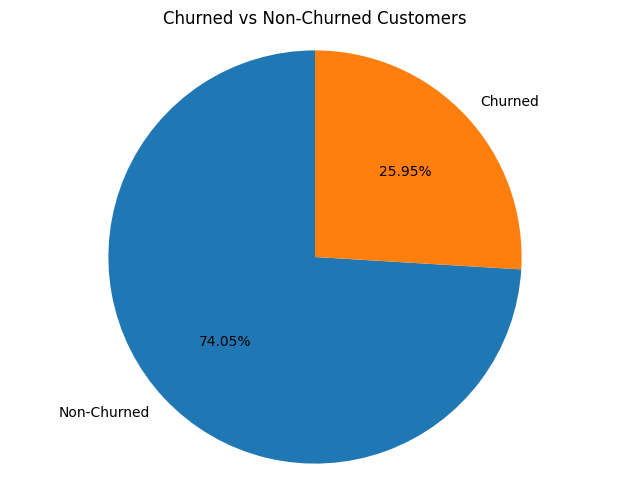

In [26]:
#first let's have overall statistics
churn_counts = df['Churn'].value_counts(normalize=True)
labels = ['Non-Churned', 'Churned']
plt.pie(churn_counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.axis('equal')  
plt.tight_layout()
plt.title('Churned vs Non-Churned Customers')
plt.show()

## Distribution analysis

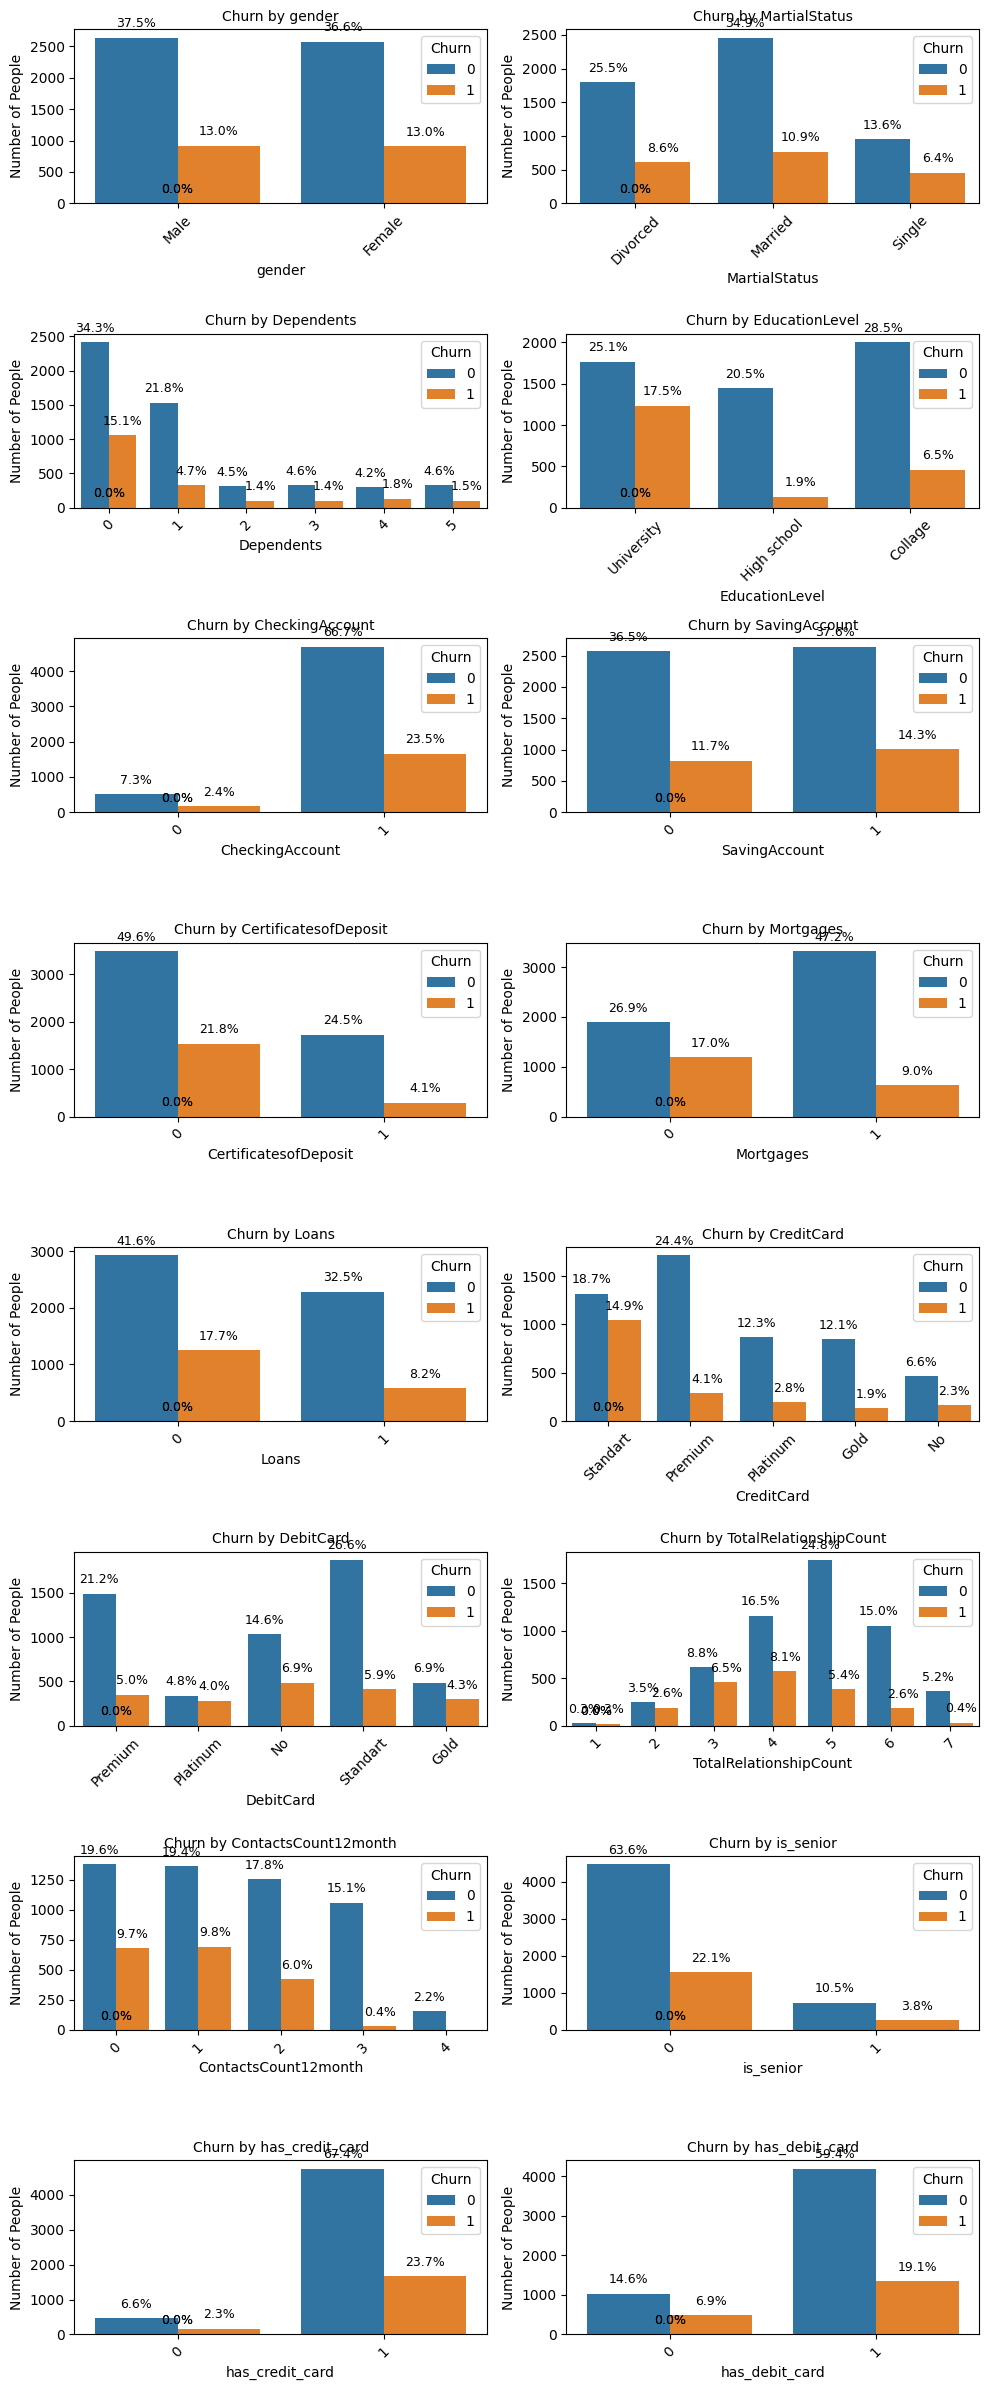

In [27]:
unique_val_vars = []
for column_name in df.columns:
    unique_vals = df[column_name].value_counts().sort_values(ascending=False).index
    unique_count = len(unique_vals) 
    if unique_count < 10 and column_name != "Churn":        
        unique_val_vars.append(column_name)
        
n = len(unique_val_vars)
nrows = (n + 1) // 2 if n % 2 else n // 2

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 3 * nrows))
axes = axes.flatten()  
for i, column_name in enumerate(unique_val_vars):
    
    ax = sns.countplot(x=column_name, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {column_name}', fontsize=10)
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Number of People')
    axes[i].tick_params(axis='x', rotation=45)

    for p in axes[i].patches:
        total = sum([p.get_height() for p in axes[i].patches])
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[i].annotate(percentage,
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10),
                         textcoords='offset points', fontsize=9)
if n % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


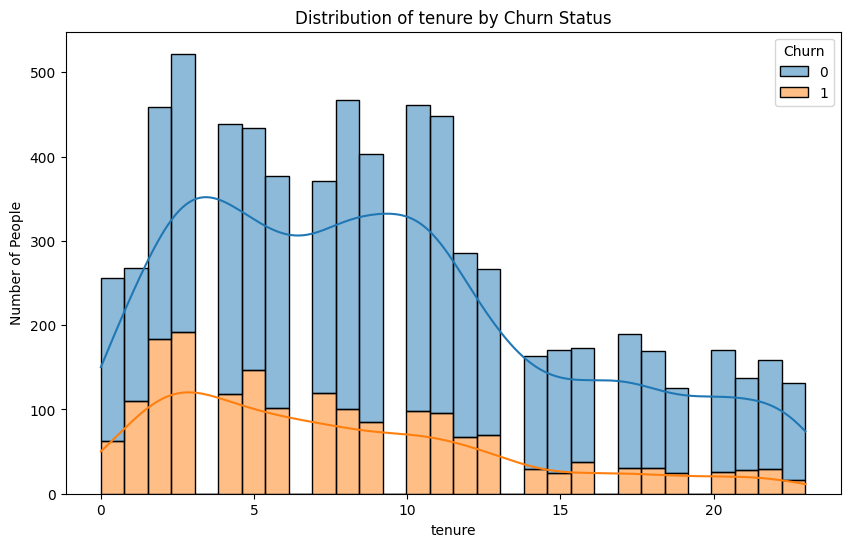

In [28]:
variable_name = 'tenure'  

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=variable_name, hue='Churn', multiple='stack', kde=True, bins=30)
plt.title(f'Distribution of {variable_name} by Churn Status')
plt.xlabel(variable_name)
plt.ylabel('Number of People')
plt.show()

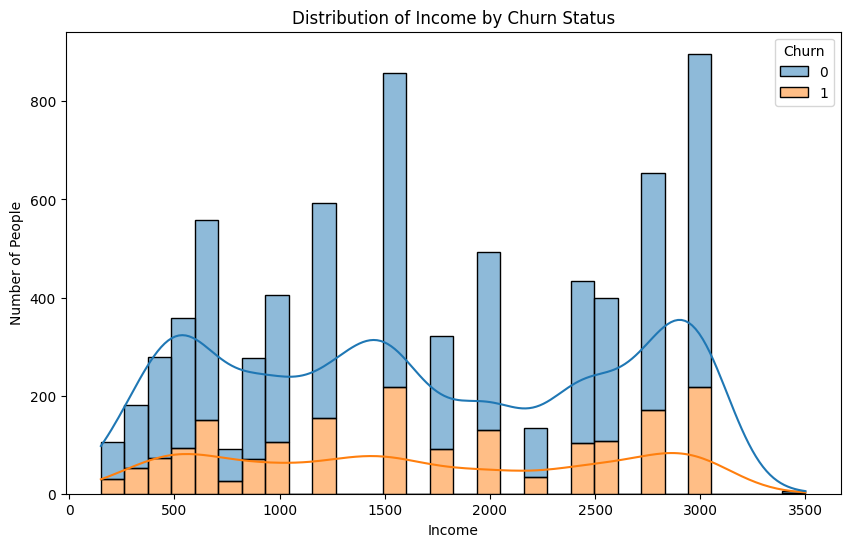

In [29]:
variable_name = 'Income'  

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=variable_name, hue='Churn', multiple='stack', kde=True, bins=30)
plt.title(f'Distribution of {variable_name} by Churn Status')
plt.xlabel(variable_name)
plt.ylabel('Number of People')
plt.show()

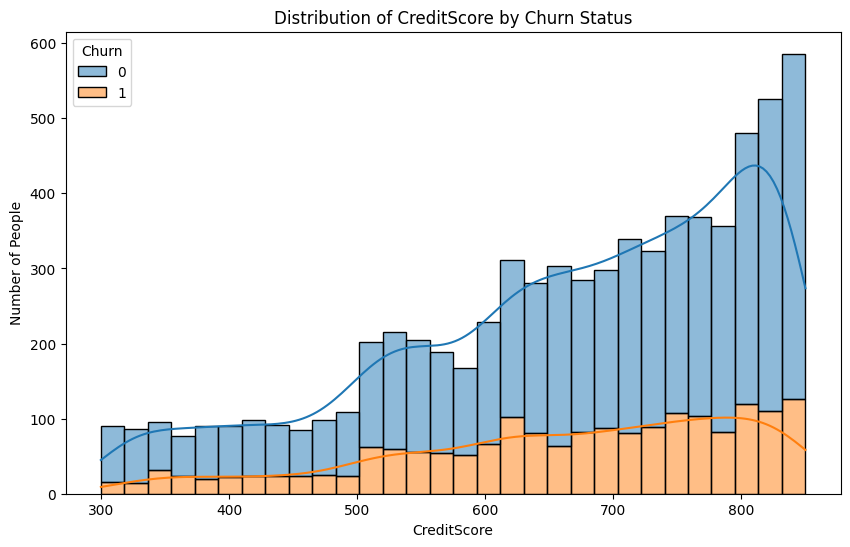

In [30]:
variable_name = 'CreditScore'  

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=variable_name, hue='Churn', multiple='stack', kde=True, bins=30)
plt.title(f'Distribution of {variable_name} by Churn Status')
plt.xlabel(variable_name)
plt.ylabel('Number of People')
plt.show()

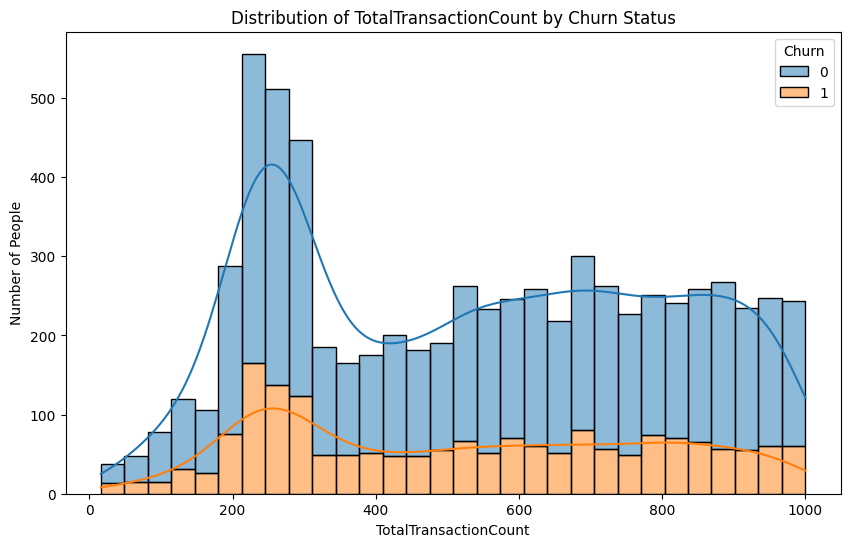

In [31]:
variable_name = 'TotalTransactionCount'  

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=variable_name, hue='Churn', multiple='stack', kde=True, bins=30)
plt.title(f'Distribution of {variable_name} by Churn Status')
plt.xlabel(variable_name)
plt.ylabel('Number of People')
plt.show()

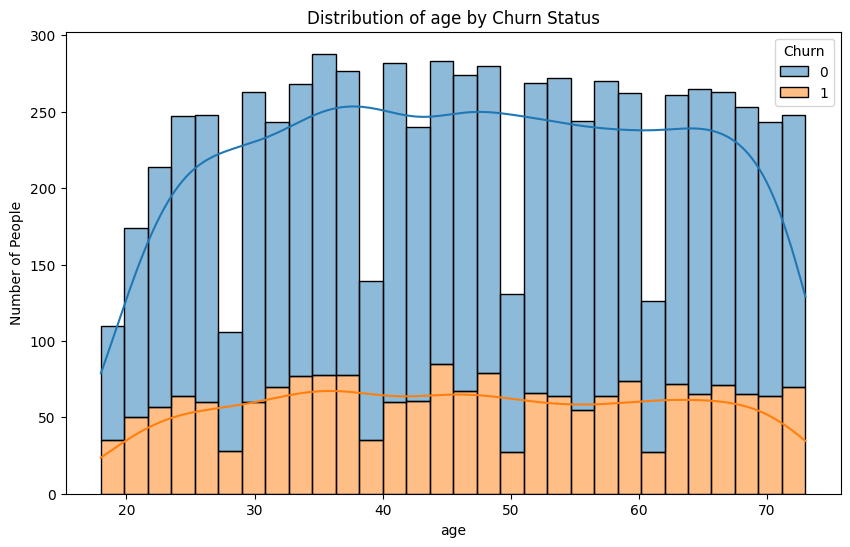

In [32]:
variable_name = 'age'  

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=variable_name, hue='Churn', multiple='stack', kde=True, bins=30)
plt.title(f'Distribution of {variable_name} by Churn Status')
plt.xlabel(variable_name)
plt.ylabel('Number of People')
plt.show()

In [33]:
df[unique_val_vars].describe()

,Dependents,CheckingAccount,SavingAccount,CertificatesofDeposit,Mortgages,Loans,TotalRelationshipCount,ContactsCount12month,is_senior,has_credit_card,has_debit_card
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.114156,0.902314,0.518387,0.286384,0.561408,0.407355,4.525202,1.321312,0.142979,0.910975,0.785035
std,1.519457,0.296910,0.499697,0.452103,0.496250,0.491377,1.298650,1.115833,0.350076,0.284799,0.410827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,1.000000,1.000000,1.000000


### Observation

After throughout analysis using histplots and subplots we can easily see that there is not much relationship between customer's gender, whether the customer has  SavingAccountor not, credit score and age

However followings are true:

1. single people are more likely to chrun than married and divorced people
2. most of the customers have 0 dependents and high percent of them are likely to churn
3. high schoolers are less likely to churn, meanwhile most churners has university degree
4. if a customer doesn't have a loan or mortgage they're more likely to churn
5. if we analize credit and debit card plots, we can see the results are totally different from each other. Percentage of churners and non-churners of the standart credit card owners, platinum debit card owners and gold debit card owners are nearly the same
6. higher the total relationahip count lower the risk of the customer's churn
7. lower the amount of contacts the customer signed in the last 12 months higher the risk of the customer's churn

In [34]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()
correlation_matrix

,Dependents,Income,CheckingAccount,SavingAccount,CertificatesofDeposit,Mortgages,Loans,CreditScore,TotalRelationshipCount,ContactsCount12month,TotalTransactionCount,Churn,tenure,age,is_senior,has_credit_card,has_debit_card
Dependents,1.000000,-0.000515,0.022833,0.004716,0.001395,0.023659,0.006559,-0.001363,0.036324,0.019822,-0.349504,-0.033186,0.018053,0.000810,-0.001857,0.022831,0.021346
Income,-0.000515,1.000000,0.007029,-0.013514,-0.002134,-0.008650,-0.000854,-0.002781,-0.011228,-0.004610,0.009185,-0.013076,0.002989,-0.239486,-0.373647,-0.003927,-0.003874
CheckingAccount,0.022833,0.007029,1.000000,-0.311403,-0.090945,0.096618,-0.024080,-0.026024,0.135655,0.024459,-0.002017,0.008258,0.072467,-0.007464,-0.004960,-0.067592,0.021076
SavingAccount,0.004716,-0.013514,-0.311403,1.000000,0.153004,-0.035907,0.169307,0.073323,0.409317,0.049126,0.027929,0.037847,0.213401,0.005449,0.001611,0.072870,0.158986
CertificatesofDeposit,0.001395,-0.002134,-0.090945,0.153004,1.000000,-0.004026,0.184969,0.042400,0.390291,0.082453,0.023901,-0.165862,0.152663,0.020714,0.011316,-0.118490,0.115130
Mortgages,0.023659,-0.008650,0.096618,-0.035907,-0.004026,1.000000,0.089286,0.069676,0.586426,0.129644,0.044258,-0.257331,0.371568,0.021863,0.002993,0.096461,0.120482
Loans,0.006559,-0.000854,-0.024080,0.169307,0.184969,0.089286,1.000000,0.107484,0.507644,0.094314,0.029636,-0.107870,0.290261,0.008710,-0.010077,0.011580,0.210144
CreditScore,-0.001363,-0.002781,-0.026024,0.073323,0.042400,0.069676,0.107484,1.000000,0.140173,0.044700,0.017919,-0.020236,0.153905,0.019044,0.000055,0.186937,0.015320
TotalRelationshipCount,0.036324,-0.011228,0.135655,0.409317,0.390291,0.586426,0.507644,0.140173,1.000000,0.188004,0.104929,-0.255169,0.598551,0.027913,0.001287,0.279246,0.524122
ContactsCount12month,0.019822,-0.004610,0.024459,0.049126,0.082453,0.129644,0.094314,0.044700,0.188004,1.000000,0.031051,-0.228264,0.086230,0.004153,0.005249,0.029252,0.098033


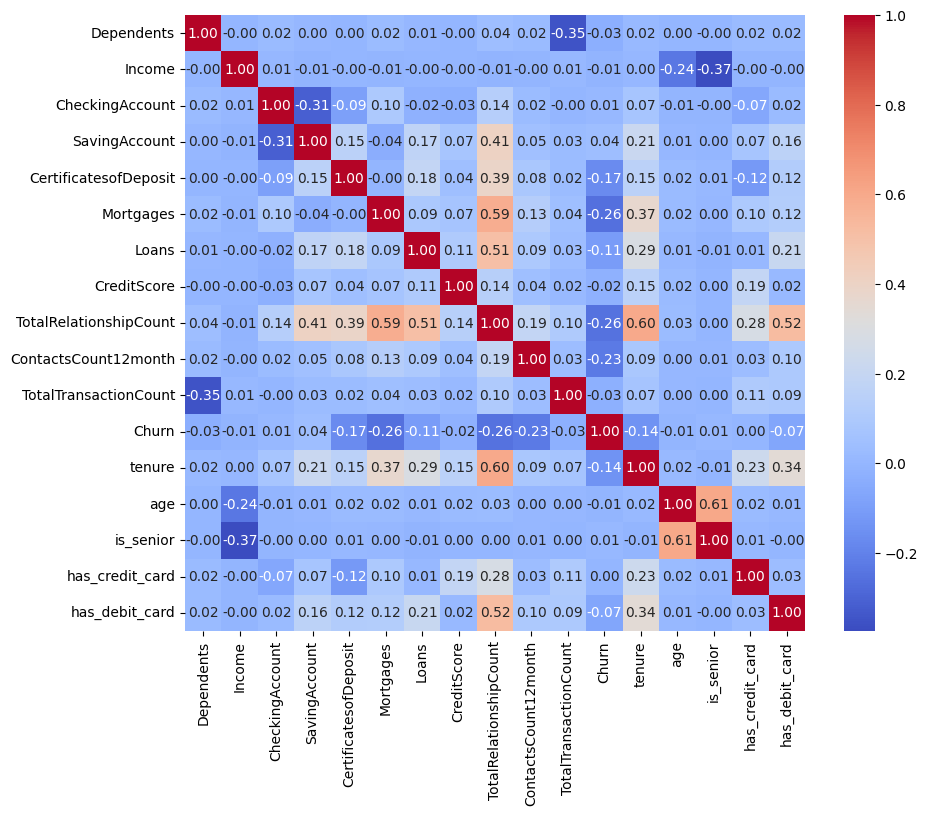

In [35]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

We can see some relationship between 
1. total relationship count and tenure,
2. total relationship count and loans,
3. total relationship count and mortgage,
4. total relationship count and having debit card,
5. total transaction count and dependents,
6. income and is_senior

## Question 1: What type of credit card holders have churned the most? How about Customer Retention?


In [36]:
result3 = df.groupby('CreditCard')['customerID'].count().reset_index(name='total_customer_count')
result4 = df.groupby('CreditCard')['Churn'].apply(lambda x: (x == 1).sum()).reset_index(name='churned_count')

text_table = result3.merge(result4, on='CreditCard')

text_table['overall_churn_rate_pct'] = np.round(text_table['churned_count'] / len(df) * 100, 2)

text_table['category_churn_rate_pct'] = np.round(text_table['churned_count'] / text_table['total_customer_count'] * 100, 1)

text_table['category_retention_ratio'] = np.round(text_table['total_customer_count'] / text_table['churned_count'], 1)

text_table.sort_values(by='overall_churn_rate_pct', ascending=False)

,CreditCard,total_customer_count,churned_count,overall_churn_rate_pct,category_churn_rate_pct,category_retention_ratio
4,Standart,2367,1047,14.87,44.2,2.3
3,Premium,2004,289,4.10,14.4,6.9
2,Platinum,1062,196,2.78,18.5,5.4
1,No,627,162,2.30,25.8,3.9
0,Gold,983,134,1.90,13.6,7.3


## Question 2: What type of debit card holders have churned the most? How about Customer Retention?

In [37]:
result3 = df.groupby('DebitCard')['customerID'].count().reset_index(name='total_customer_count')
result4 = df.groupby('DebitCard')['Churn'].apply(lambda x: (x == 1).sum()).reset_index(name='churned_count')

text_table = result3.merge(result4, on='DebitCard')

text_table['overall_churn_rate_pct'] = np.round(text_table['churned_count'] / len(df) * 100, 2)

text_table['category_churn_rate_pct'] = np.round(text_table['churned_count'] / text_table['total_customer_count'] * 100, 1)

text_table['category_retention_ratio'] = np.round(text_table['total_customer_count'] / text_table['churned_count'], 1)

text_table.sort_values(by='overall_churn_rate_pct', ascending=False)

,DebitCard,total_customer_count,churned_count,overall_churn_rate_pct,category_churn_rate_pct,category_retention_ratio
1,No,1514,484,6.87,32.0,3.1
4,Standart,2287,413,5.86,18.1,5.5
3,Premium,1841,349,4.96,19.0,5.3
0,Gold,784,301,4.27,38.4,2.6
2,Platinum,617,281,3.99,45.5,2.2


### Explanation:
The overall churn rate % shows that the bank's Standart credit card holders have churned the most with nearly 15% churn rate. 
For the rest of them the churn rate is less than 4.5% which is below the generally acceptable churn rate levels of around 5-8%. 
From this perspective, it can be seen that the customers with Standart credit cards tend to churn the most compared to other credit card categories that the bank offers. For debit card holders the overall churn rate all are lower then 8 for every category which is acceptable. 

The category churn rate % and category retention ratio variables are being used here to highlight the likelihood of churn and provide a comparison of the initial customer base to the churned customers within each category. A higher category retention ratio indicates a lower proportion of churned customers to the initial customer base, which is generally a positive sign for customer retention within that category. Conversely, a lower ratio could indicate a potential issue with customer retention that might need to be addressed for that specific category.

Now all of a sudden we see that 1 in 2 Standart credit card holders and Platinum debit card holders churned, 1 in approx 3 Gold debit card holders and no debit card holders churned, 1 in 5 Standart debit card customers, Premium debit card customers, Platinum credit card customers churned, and finally 1 in approx 7 premium and gold credit card customers churned. From this perspective, it appears that there is a potential issue with customer retention of Standart credit card customers, Platinum debit card holders customers, and Gold debit card customers as we found out earlier from subplots.

### Question 3: What age groups has the most average Total Transaction Count? And What age groups have the most churned customers?

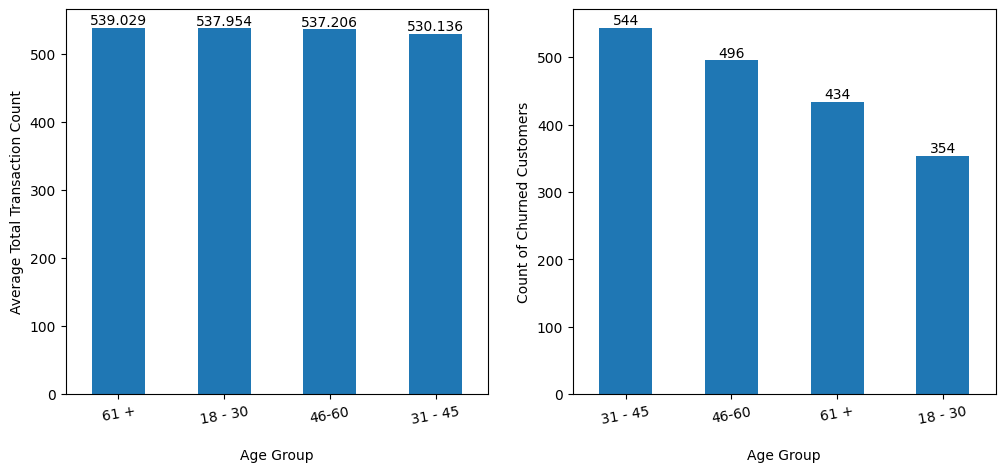

In [38]:
conditions = [
    (df['age'] > 60) ,
    (df['age'] > 45) ,
    (df['age'] > 30) ,
    (df['age'] >= 18)]

values = ['61 +', '46-60', '31 - 45', '18 - 30']    
df['age_group'] = np.select(conditions, values)

first = df.groupby(['age_group'])[('TotalTransactionCount')].apply(lambda x: x.mean()).sort_values(ascending=False)
second = df.groupby(['age_group'])['Churn'].apply(lambda x: (x == 1).sum()).sort_values(ascending=False)
plt.figure(figsize = [12, 5]) 

plt.subplot(1, 2, 1)
ax = first.plot(kind='bar', xlabel="\nAge Group" , ylabel= "Average Total Transaction Count", legend=False)
ax.bar_label(ax.containers[0], label_type= 'edge')
plt.xticks(rotation=10)

plt.subplot(1, 2, 2)
ax = second.plot(kind='bar', xlabel="\nAge Group" , ylabel= "Count of Churned Customers", legend=False)
ax.bar_label(ax.containers[0], label_type= 'edge')
plt.xticks(rotation=10)

plt.show();

### Question 4: What income category has the most churned customers?

[Text(0, 0, '636'), Text(0, 0, '599'), Text(0, 0, '593')]

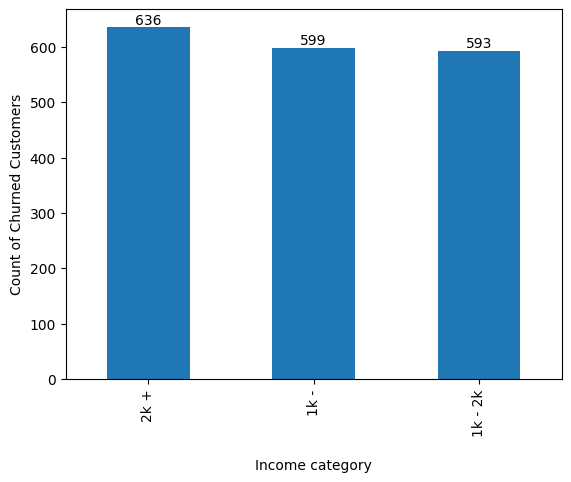

In [39]:
conditions = [
    (df['Income'] > 2000) ,
    (df['Income'] > 1000) ,
    (df['Income'] <= 1000)]

values = ['2k +', '1k - 2k', '1k -']    
df['income_category'] = np.select(conditions, values)

third = df.groupby(['income_category'])['Churn'].apply(lambda x: (x == 1).sum()).sort_values(ascending=False)

ax = third.plot(kind='bar', xlabel="\nIncome category" , ylabel= "Count of Churned Customers", legend=False)
ax.bar_label(ax.containers[0], label_type= 'edge')